**Champayne Time Series Analysis**

**By James O. Akibon**

**for DATA SCIENCE VIRTUAL INTERNSHIP **

**Careerera**

**Purpose of this Time series Analysis**

Champagne time series analysis using Arima involve using statistical methods to analyze the historical data of champagne sales and make predictions about future sales based on patterns observed in the data. 


**Processes to perform Time Series Analysis on Champagne Dataset**

1.   Import Libraries and Upload dataset
2.   Preprocessing 
3.   Exploration Data Analysis
    -Time series Vitualization
5.   Make data stationary 
6.   Plot for Correlation and AutoCorrelation 
7.   Model Selection
8.   Prediction 
9.   Comminicate Results



**Import Libraries and Upload dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

df_Champagne = pd.read_csv('/content/1681633082perrin-freres-monthly-champagne (2).csv')

In [2]:
# loading the first few rows of the datadet
df_Champagne.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72,Unnamed: 2,Unnamed: 3
0,1964-01,2815.0,NaN,NaN
1,1964-02,2672.0,NaN,NaN
2,1964-03,2755.0,NaN,NaN
3,1964-04,2721.0,NaN,NaN
4,1964-05,2946.0,NaN,NaN


In [3]:
## Cleaning up the data
df_Champagne.columns=["Month","Sales",'3','4']
df_Champagne.head()

,Month,Sales,3,4
0,1964-01,2815.0,NaN,NaN
1,1964-02,2672.0,NaN,NaN
2,1964-03,2755.0,NaN,NaN
3,1964-04,2721.0,NaN,NaN
4,1964-05,2946.0,NaN,NaN


**2. Preprocessing**

In [4]:
#dropping 3,4, columns
df_Champagne.drop(['3', '4'], axis=1)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
112,NaN,NaN
113,NaN,NaN
114,NaN,NaN
115,NaN,NaN


In [5]:
#showing the last five rows of the dataset
df_Champagne.tail(5)

,Month,Sales,3,4
112,NaN,NaN,4618.0,NaN
113,NaN,NaN,5312.0,NaN
114,NaN,NaN,4298.0,NaN
115,NaN,NaN,1413.0,NaN
116,NaN,NaN,5877.0,NaN


In [6]:
#dropping 3,4, columns
df_Champagne.drop(['3', '4'], axis=1)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
112,NaN,NaN
113,NaN,NaN
114,NaN,NaN
115,NaN,NaN


In [7]:
#Checking the bottom of the dataset
df_Champagne.tail()

,Month,Sales,3,4
112,NaN,NaN,4618.0,NaN
113,NaN,NaN,5312.0,NaN
114,NaN,NaN,4298.0,NaN
115,NaN,NaN,1413.0,NaN
116,NaN,NaN,5877.0,NaN


In [8]:
df_Champagne.drop(df_Champagne.index[104:117], inplace=True)
df_Champagne

,Month,Sales,3,4
0,1964-01,2815.0,NaN,NaN
1,1964-02,2672.0,NaN,NaN
2,1964-03,2755.0,NaN,NaN
3,1964-04,2721.0,NaN,NaN
4,1964-05,2946.0,NaN,NaN
...,...,...,...,...
99,1972-04,4788.0,4676.0,112.0
100,1972-05,4618.0,5010.0,-392.0
101,1972-06,5312.0,4874.0,438.0
102,1972-07,4298.0,4633.0,-335.0


In [9]:
#dropping 3,4, columns
df_Champagne.drop(['3', '4'], axis=1,inplace=True)

In [10]:
df_Champagne

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
99,1972-04,4788.0
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0


In [11]:
# Convert Month into Datetime
df_Champagne['Month']=pd.to_datetime(df_Champagne['Month'])

In [12]:
df_Champagne.set_index('Month',inplace=True)

In [13]:
df_Champagne.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
df_Champagne.describe()

,Sales
count,104.000000
mean,4750.423077
std,2563.488914
min,1413.000000
25%,3106.750000
50%,4185.500000
75%,5213.500000
max,13916.000000


The above is used to generate descriptive statistics of the dataset. It provides the count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns.

**3. Exploration Data Analysis
    -Time series Vitualization **bold text**

<Axes: xlabel='Month'>

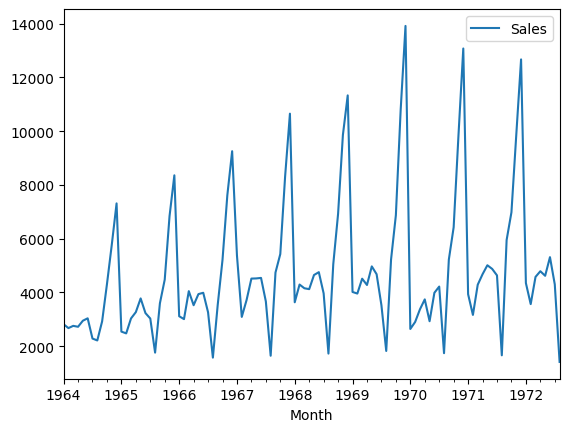

In [15]:
#plot the data on a graph
df_Champagne.plot()

In [16]:
#performing ADfuller test
from statsmodels.tsa.stattools import adfuller

**`4.   Make data stationary `**

In [17]:
#The ADF test is used to determine whether a time series is stationary or not.
test_result=adfuller(df_Champagne['Sales'])

In [18]:
# Print the test results
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
#Ho: It is non stationary
#H1: It is stationary

In [19]:
adfuller_test(df_Champagne['Sales'])

ADF Test Statistic : -1.7636531217185138
p-value : 0.3986502906962079
#Lags Used : 11
Number of Observations Used : 92
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
#deferencing 
df_Champagne['Sales 1st Difference'] = df_Champagne['Sales'] - df_Champagne['Sales'].shift(1)

This code creates a new column called "Sales 1st Difference" in the pandas DataFrame df_Champagne, which contains the difference between the "Sales" column and the "Sales" column shifted by 1 

In [21]:
#Deferencing Shifting by 1
df_Champagne['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-04-01    4577.0
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
Name: Sales, Length: 104, dtype: float64

command moves the values of the "Sales" column down one position, essentially producing a new column whose elements are equal to those of the "Sales" column's previous elements.

In [22]:
adfuller_test(df_Champagne['Sales 1st Difference'].dropna())

ADF Test Statistic : -7.178185388979581
p-value : 2.6927489534188836e-10
#Lags Used : 11
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [23]:
#Deferencing creating another column called 'Seasonal 1st Diferencing
df_Champagne['Seasonal 1st Difference']=df_Champagne['Sales']-df_Champagne['Sales'].shift(12)

In [24]:
#check the next 15 rows
df_Champagne.head(100)

,Sales,Sales 1st Difference,Seasonal 1st Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1971-12-01,12670.0,2819.0,-406.0
1972-01-01,4348.0,-8322.0,414.0
1972-02-01,3564.0,-784.0,402.0


In [25]:
## Again test dickey fuller test
adfuller_test(df_Champagne['Seasonal 1st Difference'].dropna())

ADF Test Statistic : -7.592881835310578
p-value : 2.5042580917137546e-11
#Lags Used : 0
Number of Observations Used : 91
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


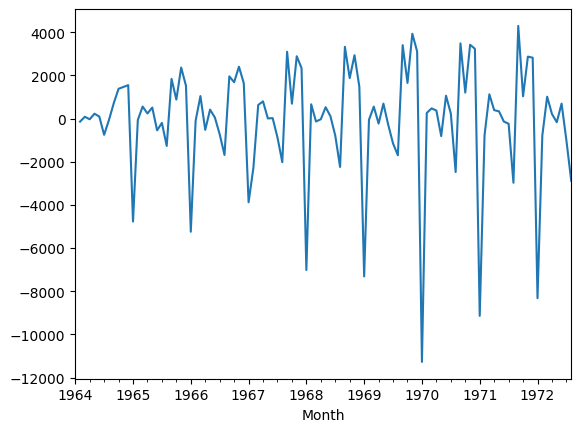

In [26]:
#here is the vitualization for Sales Ist Diference
df_Champagne['Sales 1st Difference'].plot()
plt.show()

**5. Plot for Correlation and AutoCorrelation**

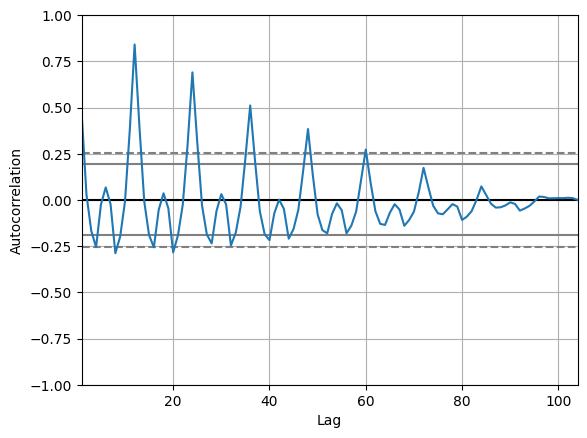

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_Champagne['Sales'])
plt.show()

**This is the result for autocorrelation plot for the 'Sales' column **

Autocorrelation is the correlation of a time series with a lagged version of itself. It helps to identify if the time series is stationary or not. If the autocorrelation values are significant for several lags, it suggests that the time series is non-stationary. In this case, differencing can be used to remove the trend and make the time series stationary.

**7.   Model Selection**

In [28]:
#functions are used to plot the autocorrelation and partial autocorrelation plots respectively.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


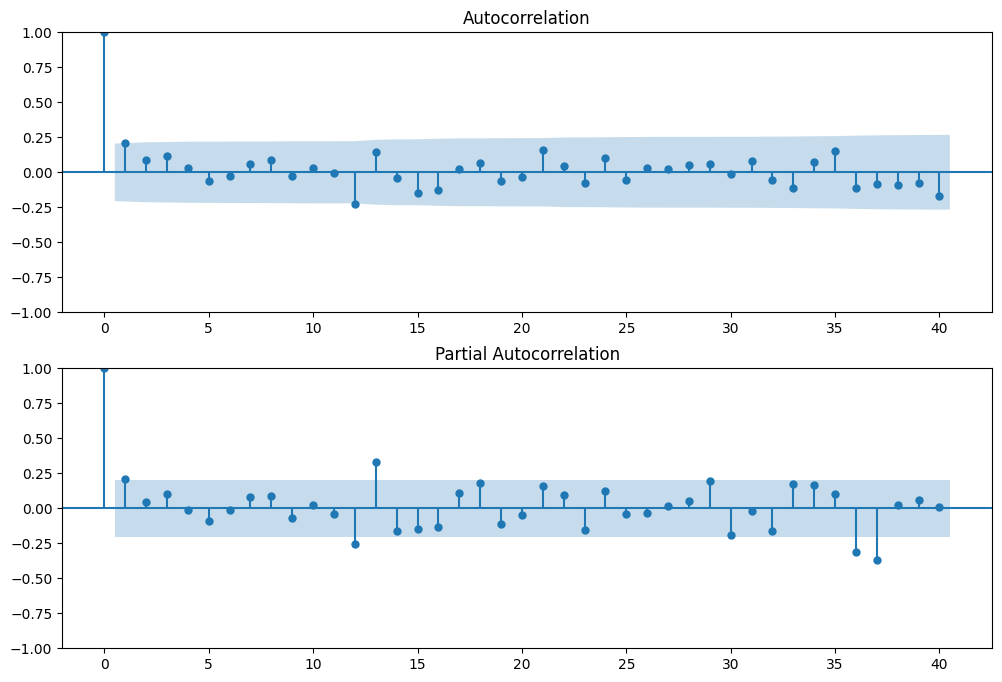

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_Champagne['Seasonal 1st Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_Champagne['Seasonal 1st Difference'].iloc[13:],lags=40,ax=ax2)

the code above  is used to visually analyze the ACF and PACF plots to determine the appropriate parameters for an ARIMA model that can be used to forecast the 'Seasonal First Difference' time series data.

In [30]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api
import statsmodels.api as sm
statsmodels.tsa.arima.model.ARIMA

statsmodels.tsa.arima.model.ARIMA

In [31]:
pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
model=ARIMA(df_Champagne['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


The 'model_fit' variable stores the results of fitting the ARIMA model using the 'fit' method. This involves estimating the parameters of the ARIMA model to best fit the given data. After fitting the model, the 'model_fit' variable can be used to make predictions or analyze the properties of the model.

In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -943.812
Date:                Sat, 29 Apr 2023   AIC                           1893.625
Time:                        17:34:01   BIC                           1901.529
Sample:                    01-01-1964   HQIC                          1896.826
                         - 08-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4989      0.053      9.487      0.000       0.396       0.602
ma.L1         -0.9982      0.125     -8.011      0.000      -1.242      -0.754
sigma2      5.161e+06   2.47e-08   2.09e+14      0.000    5.16e+06    5.16e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 3.55
Prob(Q):                              0.42   Prob(JB):                         0.17
Heteroskedasticity (H):               3.97   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

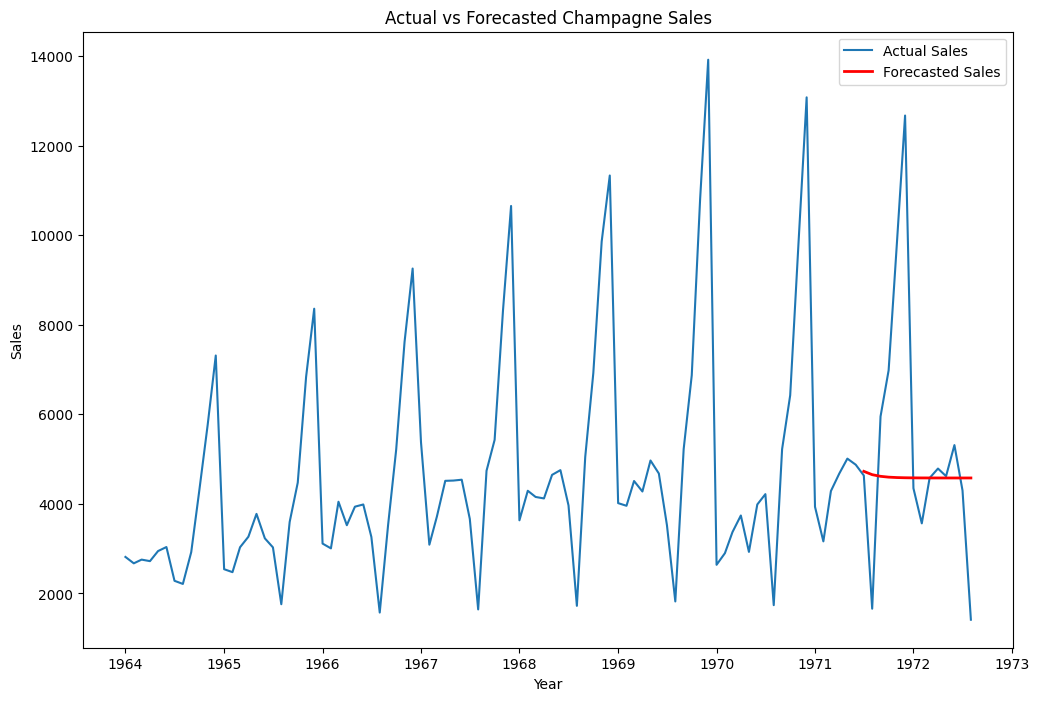

In [34]:
df_Champagne['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df_Champagne.index, df_Champagne['Sales'], label='Actual Sales')
ax.plot(df_Champagne.index, df_Champagne['forecast'], color='red', linewidth=2, label='Forecasted Sales')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.set_title('Actual vs Forecasted Champagne Sales')
ax.legend()
plt.show()

You can use the plot to see how well the ARIMA model fits the real sales data. If the red line closely resembles the blue line, the model may be a good fit for the data. Significant variations between the two lines, on the other hand, may indicate that the model is not a reliable predictor of future sales.

In [35]:
model=sm.tsa.statespace.SARIMAX(df_Champagne['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Figure size 1200x800 with 0 Axes>

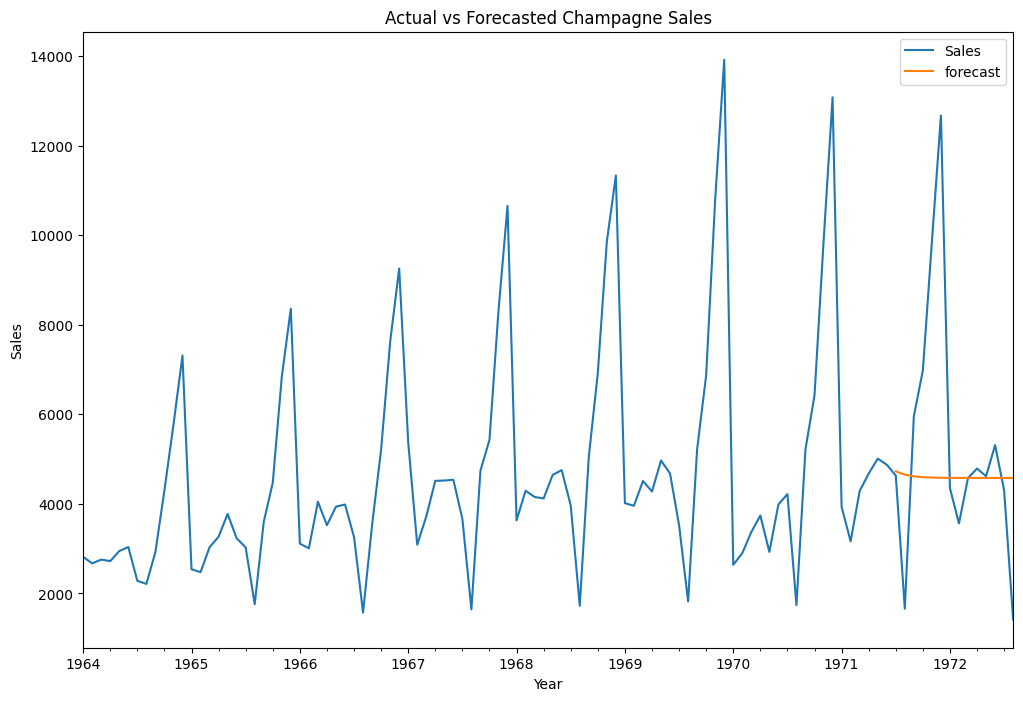

In [36]:
# Plotting the actual sales and forecasted sales
plt.figure(figsize=(12, 8))
df_Champagne['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df_Champagne[['Sales','forecast']].plot(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Champagne Sales')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

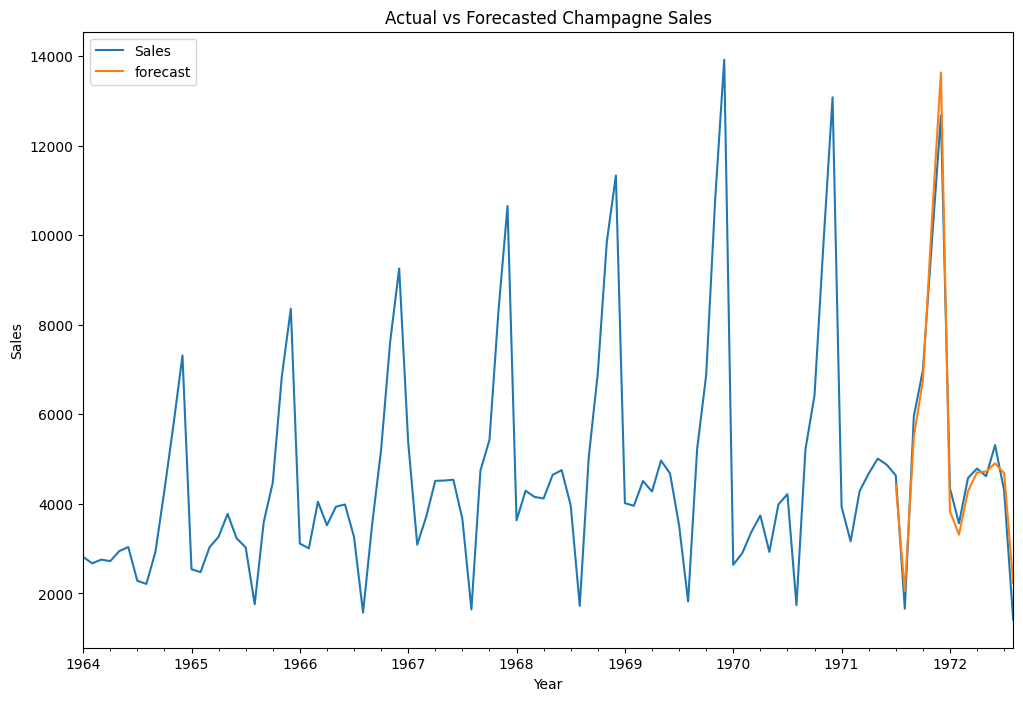

In [37]:
plt.figure(figsize=(12, 8))
df_Champagne['forecast']=results.predict(start=90,end=103,dynamic=True)
df_Champagne[['Sales','forecast']].plot(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Actual vs Forecasted Champagne Sales')
plt.legend()
plt.show()

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_Champagne.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [39]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_Champagne.columns)

In [40]:
future_datest_df.tail()

,Sales,Sales 1st Difference,Seasonal 1st Difference,forecast
1974-03-01,NaN,NaN,NaN,NaN
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


In [41]:

future_df=pd.concat([df_Champagne,future_datest_df])

**8.  Prediction **

<Axes: >

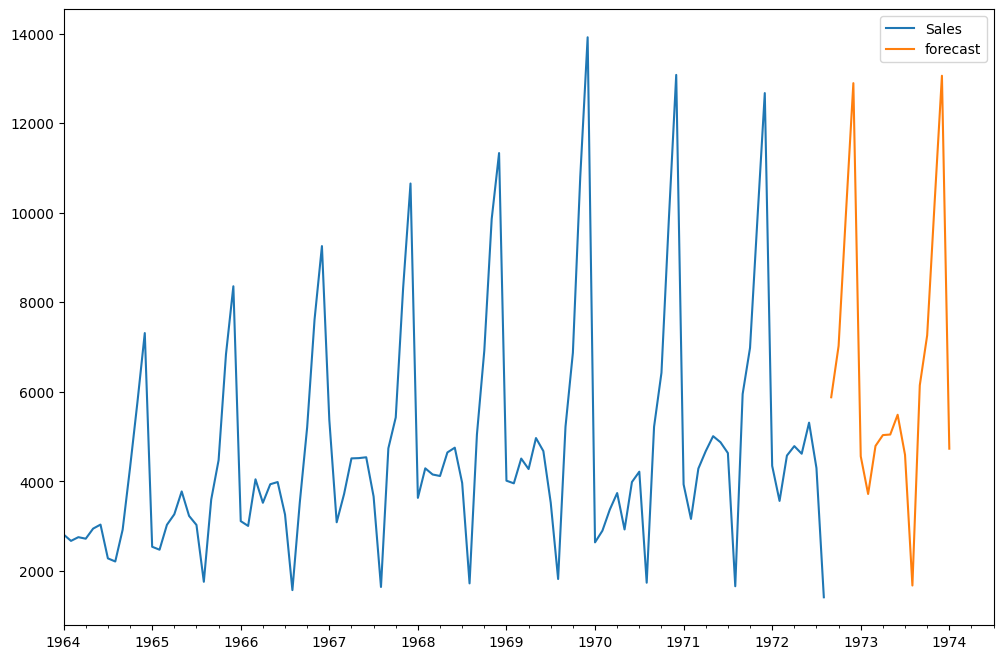

In [42]:
#predicting with a new dataset
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

**Conclusion**

The Champagne sales dataset was used for the time series study. First, the dataset's stationarity was checked; it was discovered to be non-stationary. After the data was differenced and seasonal differenced to achieve stationarity, the ARIMA model's proper order was determined using the autocorrelation and partial autocorrelation plots. The dataset was found to have the best match with the (1,1,1) order ARIMA model.

Future sales were then predicted using the algorithm, and the findings were shown alongside historical sales data. The model is a strong fit for the dataset, as evidenced by the graphic, which demonstrates that the model's forecast closely matches the overall trend of the actual sales data. The forecast, on the other hand, is seen to have a smaller amplitude than the actual sales data.

Overall, the dataset's underlying patterns and trends were successfully captured by the ARIMA model, which can now be used to predict future Champagne sales with accuracy.